In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
# Load the dataset
df = pd.read_csv('dataset/dataset.csv')

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


📊 TRANSACTION AMOUNT DISTRIBUTION ANALYSIS


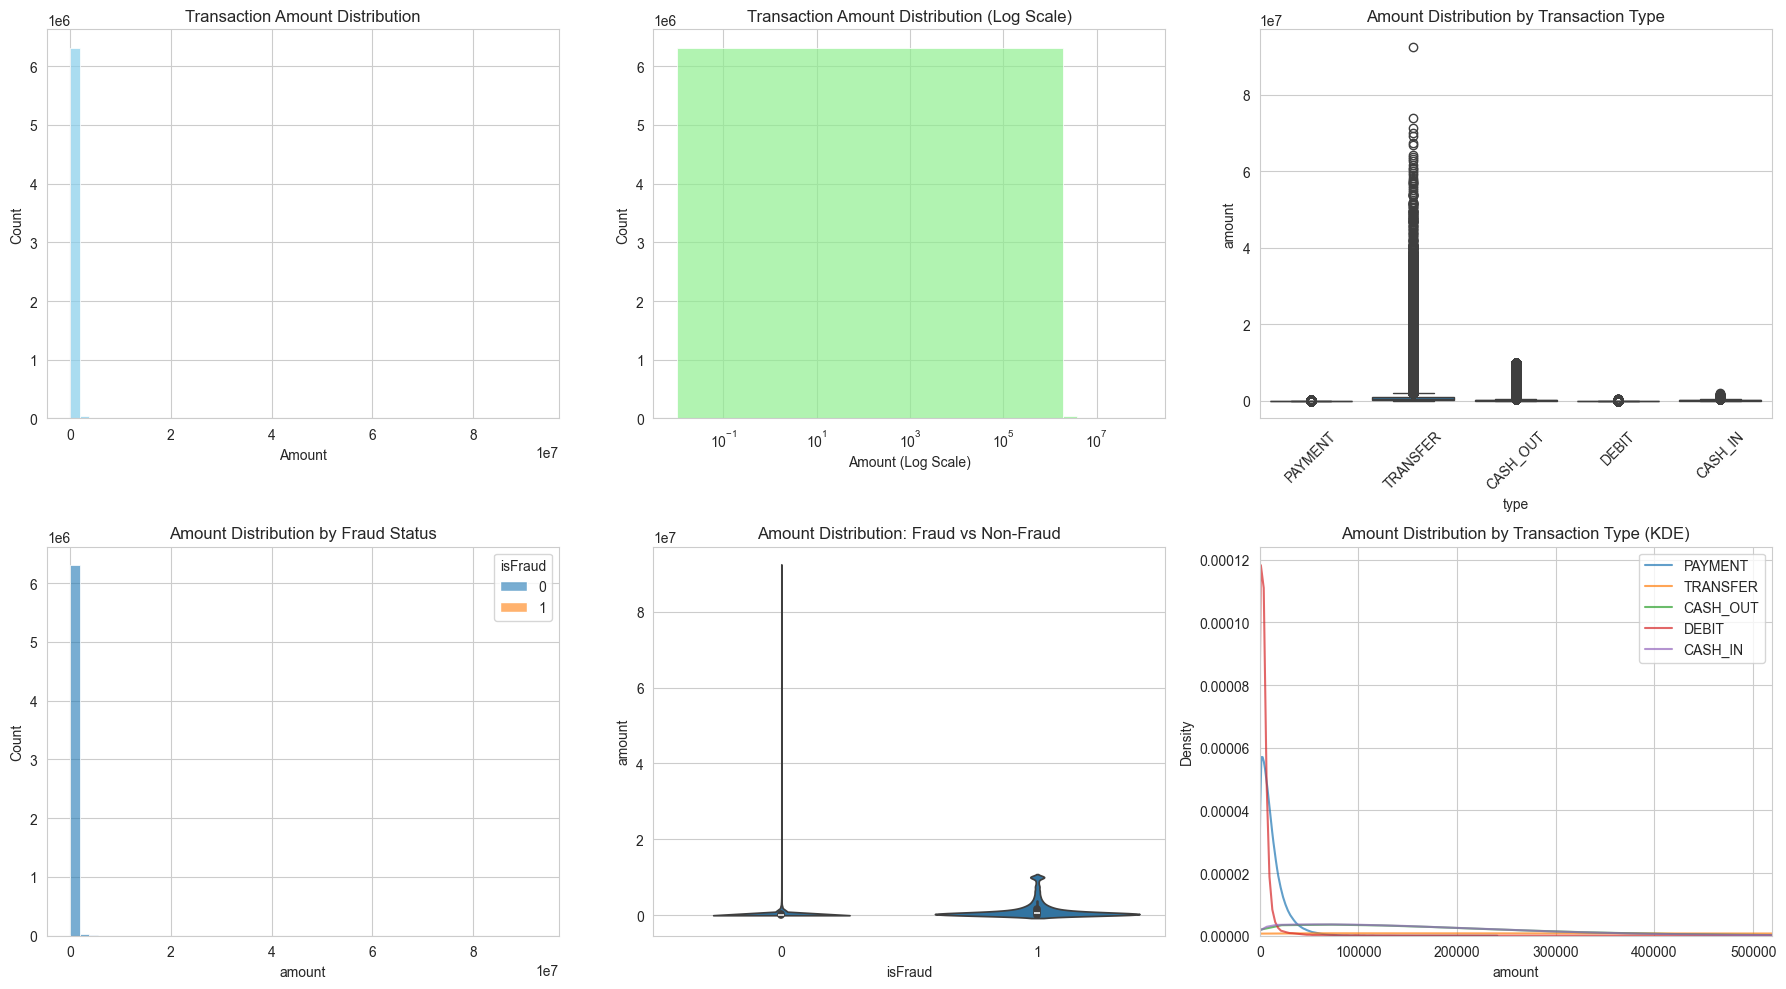

Amount Statistics:
Mean: $179,861.90
Median: $74,871.94
Max: $92,445,516.64
Min: $0.00


In [11]:
# Distribution Analysis of Transaction Amounts
print("📊 TRANSACTION AMOUNT DISTRIBUTION ANALYSIS")
print("=" * 50)

# Seaborn version
plt.figure(figsize=(18, 10))

# Overall amount distribution
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='amount', bins=50, alpha=0.7, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')

# Log scale for better visualization
plt.subplot(2, 3, 2)
sns.histplot(data=df[df['amount'] > 0], x='amount', bins=50, alpha=0.7, color='lightgreen')
plt.xscale('log')
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Amount (Log Scale)')

# Box plot by transaction type
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='type', y='amount')
plt.title('Amount Distribution by Transaction Type')
plt.xticks(rotation=45)

# Amount distribution by fraud status
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='amount', hue='isFraud', bins=50, alpha=0.6)
plt.title('Amount Distribution by Fraud Status')

# Violin plot by fraud status
plt.subplot(2, 3, 5)
sns.violinplot(data=df, x='isFraud', y='amount')
plt.title('Amount Distribution: Fraud vs Non-Fraud')

# KDE plot by transaction type
plt.subplot(2, 3, 6)
for transaction_type in df['type'].unique():
    subset = df[df['type'] == transaction_type]
    sns.kdeplot(data=subset, x='amount', label=transaction_type, alpha=0.7)
plt.title('Amount Distribution by Transaction Type (KDE)')
plt.legend()
plt.xlim(0, df['amount'].quantile(0.95))

plt.tight_layout()
plt.show()


# Print statistics
print(f"Amount Statistics:")
print(f"Mean: ${df['amount'].mean():,.2f}")
print(f"Median: ${df['amount'].median():,.2f}")
print(f"Max: ${df['amount'].max():,.2f}")
print(f"Min: ${df['amount'].min():,.2f}")

🔍 FRAUD DETECTION CORRELATION ANALYSIS


Features most correlated with Fraud:
amount: 0.0767
isFlaggedFraud: 0.0441
step: 0.0316
oldbalanceOrg: 0.0102
newbalanceOrig: 0.0081
oldbalanceDest: 0.0059
newbalanceDest: 0.0005


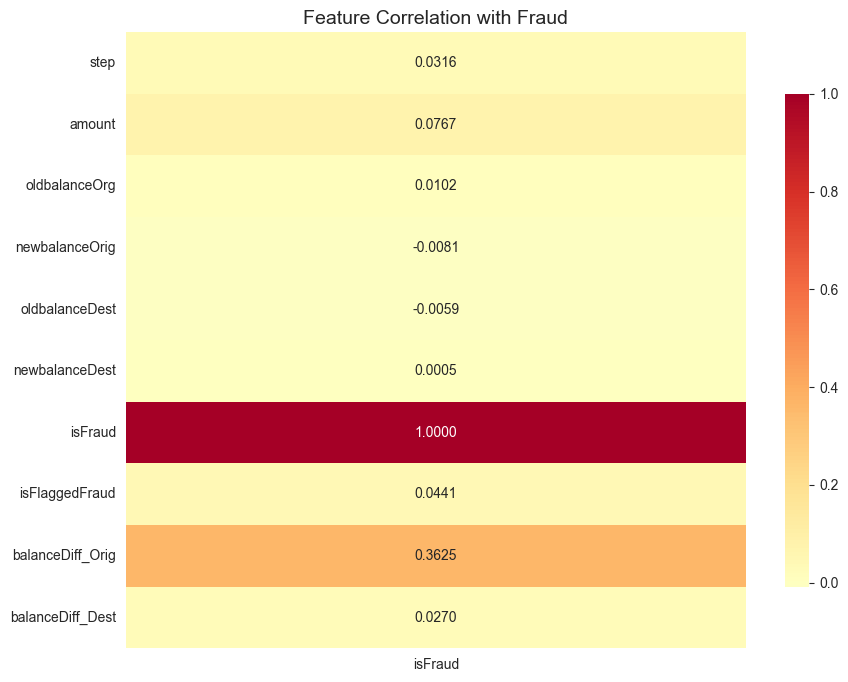

In [12]:
# Correlation Analysis for Fraud Detection
print("🔍 FRAUD DETECTION CORRELATION ANALYSIS")
print("=" * 50)

# Select numeric columns for correlation
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
corr_matrix = df[numeric_cols].corr()

# Plotly version
fig = px.imshow(corr_matrix, 
                text_auto='.3f', 
                aspect="auto",
                color_continuous_scale='RdYlBu_r',
                title='Interactive Correlation Heatmap - Fraud Detection Features')
fig.update_layout(width=700, height=600)
fig.show()

# Focus on fraud correlations
fraud_corr = corr_matrix['isFraud'].abs().sort_values(ascending=False)
print("Features most correlated with Fraud:")
for feature, corr in fraud_corr.items():
    if feature != 'isFraud':
        print(f"{feature}: {corr:.4f}")

# Create balance difference features for better analysis
df['balanceDiff_Orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiff_Dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Enhanced correlation with new features
enhanced_cols = numeric_cols + ['balanceDiff_Orig', 'balanceDiff_Dest']
enhanced_corr = df[enhanced_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(enhanced_corr['isFraud'].to_frame(), annot=True, cmap='RdYlBu_r', 
            center=0, fmt='.4f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation with Fraud', fontsize=14)
plt.show()

💸 TRANSACTION TYPE AND FRAUD ANALYSIS


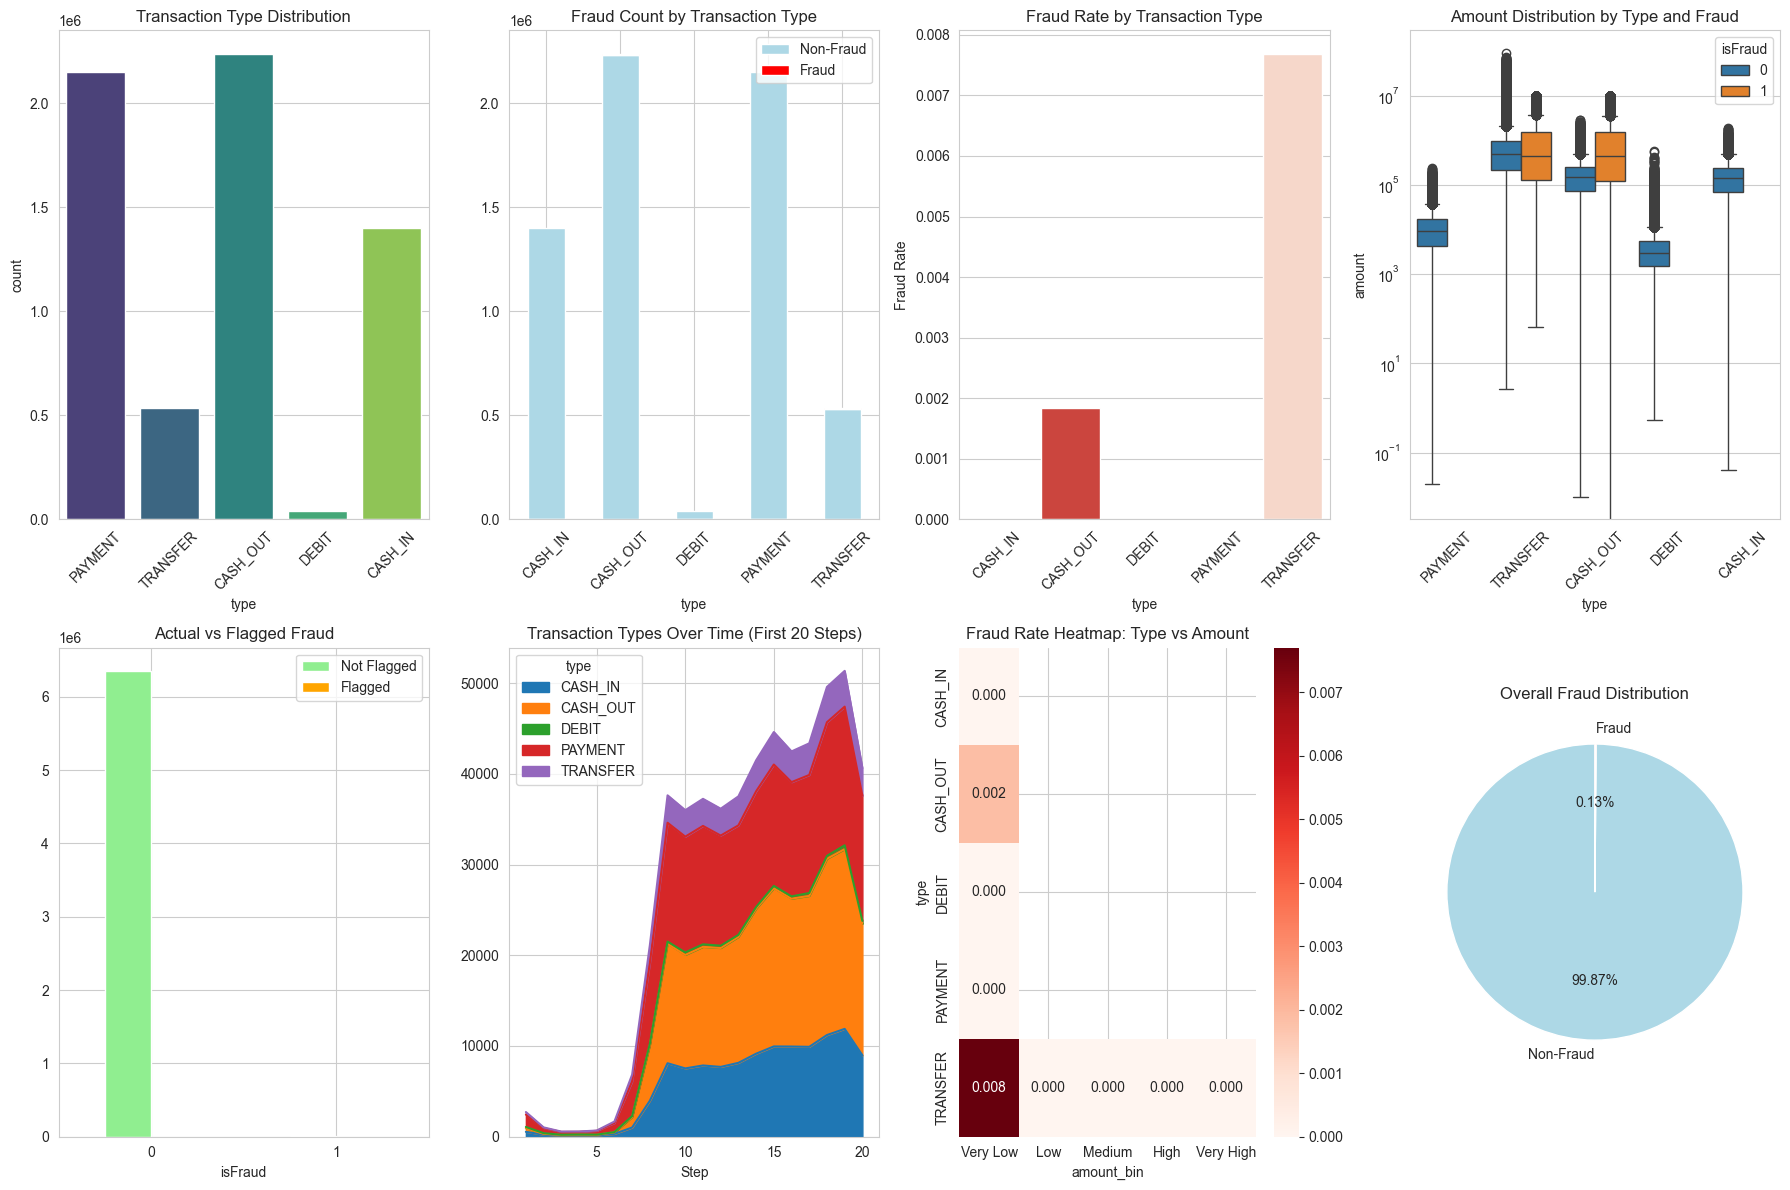


📊 Fraud Statistics by Transaction Type:
          Total_Transactions  Fraud_Count  Fraud_Rate   Avg_Amount  \
type                                                                 
CASH_IN              1399284            0      0.0000  168920.2420   
CASH_OUT             2237500         4116      0.0018  176273.9643   
DEBIT                  41432            0      0.0000    5483.6653   
PAYMENT              2151495            0      0.0000   13057.6047   
TRANSFER              532909         4097      0.0077  910647.0096   

          Median_Amount  
type                     
CASH_IN      143427.710  
CASH_OUT     147072.185  
DEBIT          3048.990  
PAYMENT        9482.190  
TRANSFER     486308.390  


In [13]:
# Transaction Type and Fraud Analysis
print("💸 TRANSACTION TYPE AND FRAUD ANALYSIS")
print("=" * 50)

# Seaborn version
plt.figure(figsize=(18, 12))

# Transaction type distribution
plt.subplot(2, 4, 1)
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)

# Fraud by transaction type
plt.subplot(2, 4, 2)
fraud_by_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
fraud_by_type.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'red'])
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])

# Fraud rate by transaction type
plt.subplot(2, 4, 3)
fraud_rate = df.groupby('type')['isFraud'].mean()
sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Reds_r')
plt.title('Fraud Rate by Transaction Type')
plt.xticks(rotation=45)
plt.ylabel('Fraud Rate')

# Amount by transaction type and fraud
plt.subplot(2, 4, 4)
sns.boxplot(data=df, x='type', y='amount', hue='isFraud')
plt.title('Amount Distribution by Type and Fraud')
plt.xticks(rotation=45)
plt.yscale('log')

# Flagged fraud analysis
plt.subplot(2, 4, 5)
flagged_analysis = df.groupby(['isFraud', 'isFlaggedFraud']).size().unstack(fill_value=0)
flagged_analysis.plot(kind='bar', ax=plt.gca(), color=['lightgreen', 'orange'])
plt.title('Actual vs Flagged Fraud')
plt.xticks(rotation=0)
plt.legend(['Not Flagged', 'Flagged'])

# Transaction type by step
plt.subplot(2, 4, 6)
step_type = df.groupby(['step', 'type']).size().unstack(fill_value=0)
step_type.iloc[:20].plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Transaction Types Over Time (First 20 Steps)')
plt.xlabel('Step')

# Heatmap of fraud by type and amount bins
plt.subplot(2, 4, 7)
df['amount_bin'] = pd.cut(df['amount'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
fraud_heatmap = df.groupby(['type', 'amount_bin'])['isFraud'].mean().unstack()
sns.heatmap(fraud_heatmap, annot=True, cmap='Reds', fmt='.3f')
plt.title('Fraud Rate Heatmap: Type vs Amount')

# Pie chart for overall fraud distribution
plt.subplot(2, 4, 8)
fraud_counts = df['isFraud'].value_counts()
plt.pie(fraud_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', 
        colors=['lightblue', 'red'], startangle=90)
plt.title('Overall Fraud Distribution')

plt.tight_layout()
plt.show()

# Print fraud statistics by type
print("\n📊 Fraud Statistics by Transaction Type:")
fraud_stats = df.groupby('type').agg({
    'isFraud': ['count', 'sum', 'mean'],
    'amount': ['mean', 'median']
}).round(4)
fraud_stats.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate', 'Avg_Amount', 'Median_Amount']
print(fraud_stats)

💰 BALANCE ANALYSIS AND MONEY FLOW


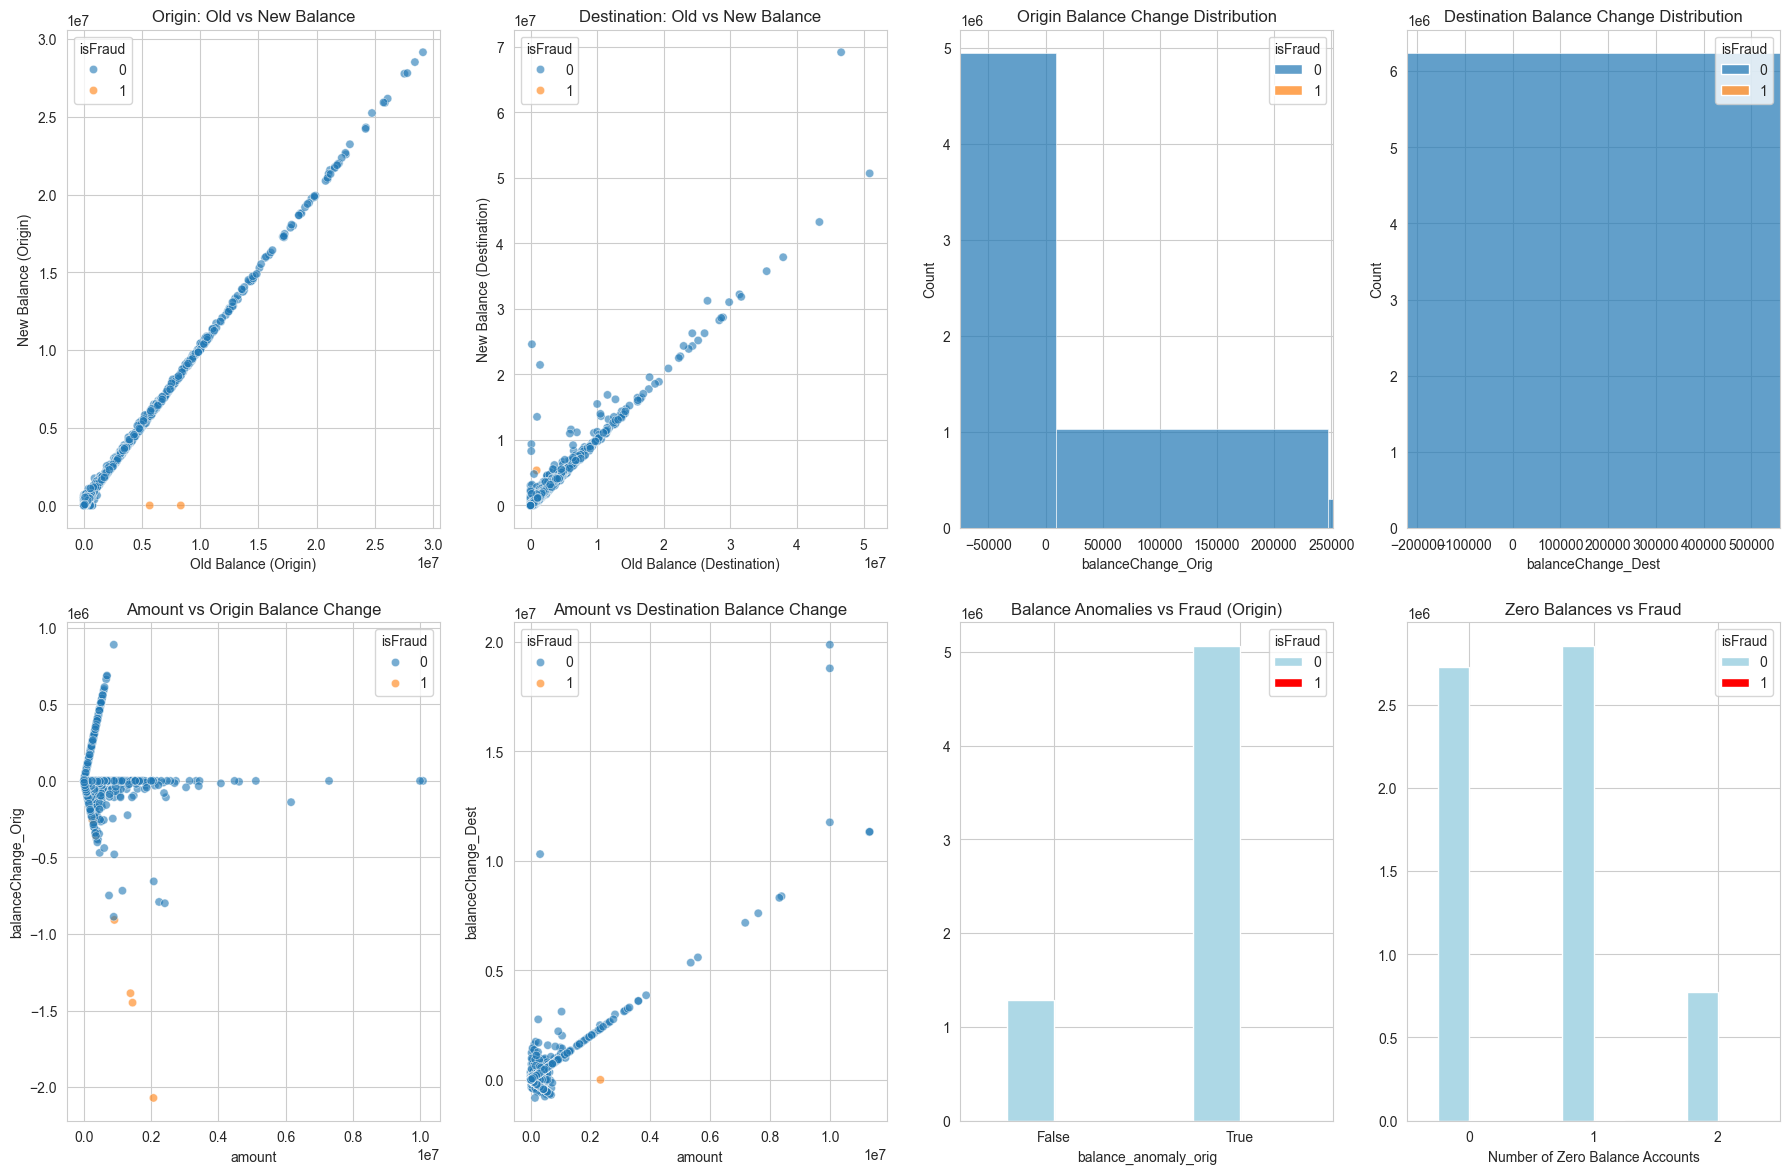


💡 Balance Analysis Insights:
Transactions with origin balance anomalies: 5,066,425
Fraud rate in balance anomalies: 0.0000
Normal fraud rate: 0.0063


In [14]:
# Balance Analysis and Money Flow
print("💰 BALANCE ANALYSIS AND MONEY FLOW")
print("=" * 50)

# Create balance change features
df['balanceChange_Orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChange_Dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Seaborn version
plt.figure(figsize=(18, 12))

# Original balance vs new balance (Origin)
plt.subplot(2, 4, 1)
sns.scatterplot(data=df.sample(5000), x='oldbalanceOrg', y='newbalanceOrig', 
                hue='isFraud', alpha=0.6)
plt.title('Origin: Old vs New Balance')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')

# Destination balance vs new balance
plt.subplot(2, 4, 2)
sns.scatterplot(data=df.sample(5000), x='oldbalanceDest', y='newbalanceDest', 
                hue='isFraud', alpha=0.6)
plt.title('Destination: Old vs New Balance')
plt.xlabel('Old Balance (Destination)')
plt.ylabel('New Balance (Destination)')

# Balance change distribution
plt.subplot(2, 4, 3)
sns.histplot(data=df, x='balanceChange_Orig', hue='isFraud', bins=50, alpha=0.7)
plt.title('Origin Balance Change Distribution')
plt.xlim(df['balanceChange_Orig'].quantile(0.05), df['balanceChange_Orig'].quantile(0.95))

plt.subplot(2, 4, 4)
sns.histplot(data=df, x='balanceChange_Dest', hue='isFraud', bins=50, alpha=0.7)
plt.title('Destination Balance Change Distribution')
plt.xlim(df['balanceChange_Dest'].quantile(0.05), df['balanceChange_Dest'].quantile(0.95))

# Amount vs balance changes
plt.subplot(2, 4, 5)
sns.scatterplot(data=df.sample(5000), x='amount', y='balanceChange_Orig', 
                hue='isFraud', alpha=0.6)
plt.title('Amount vs Origin Balance Change')

plt.subplot(2, 4, 6)
sns.scatterplot(data=df.sample(5000), x='amount', y='balanceChange_Dest', 
                hue='isFraud', alpha=0.6)
plt.title('Amount vs Destination Balance Change')

# Balance anomalies detection
plt.subplot(2, 4, 7)
# Cases where balance change doesn't match amount
df['balance_anomaly_orig'] = abs(df['amount'] + df['balanceChange_Orig']) > 0.01
df['balance_anomaly_dest'] = abs(df['amount'] - df['balanceChange_Dest']) > 0.01
anomaly_fraud = df.groupby(['balance_anomaly_orig', 'isFraud']).size().unstack(fill_value=0)
anomaly_fraud.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'red'])
plt.title('Balance Anomalies vs Fraud (Origin)')
plt.xticks(rotation=0)

plt.subplot(2, 4, 8)
# Zero balance analysis
zero_balance_orig = (df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)
zero_balance_dest = (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)
df['zero_balances'] = zero_balance_orig.astype(int) + zero_balance_dest.astype(int)
zero_fraud = df.groupby(['zero_balances', 'isFraud']).size().unstack(fill_value=0)
zero_fraud.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'red'])
plt.title('Zero Balances vs Fraud')
plt.xlabel('Number of Zero Balance Accounts')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Plotly 3D scatter plot
sample_df = df.sample(10000)
fig = px.scatter_3d(sample_df, x='oldbalanceOrg', y='amount', z='newbalanceOrig',
                    color='isFraud', opacity=0.6,
                    title='3D Analysis: Old Balance vs Amount vs New Balance (Origin)',
                    color_discrete_map={0: 'blue', 1: 'red'})
fig.show()

# Balance flow analysis
fig2 = go.Figure()

# Add traces for different transaction types
for trans_type in df['type'].unique():
    subset = df[df['type'] == trans_type].sample(min(1000, len(df[df['type'] == trans_type])))
    fig2.add_trace(go.Scatter(
        x=subset['balanceChange_Orig'],
        y=subset['balanceChange_Dest'],
        mode='markers',
        name=trans_type,
        opacity=0.6
    ))

fig2.update_layout(
    title='Balance Flow: Origin Change vs Destination Change by Transaction Type',
    xaxis_title='Origin Balance Change',
    yaxis_title='Destination Balance Change'
)
fig2.show()

print("\n💡 Balance Analysis Insights:")
print(f"Transactions with origin balance anomalies: {df['balance_anomaly_orig'].sum():,}")
print(f"Fraud rate in balance anomalies: {df[df['balance_anomaly_orig']]['isFraud'].mean():.4f}")
print(f"Normal fraud rate: {df[~df['balance_anomaly_orig']]['isFraud'].mean():.4f}")

In [ ]:
# Drop ID columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encode the 'type' column
df = pd.get_dummies(df, columns=['type'])

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Oversample only the fraud class to 25,000
if y.value_counts()[1] < 25000:
    smote = SMOTE(sampling_strategy={1: 25000}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    # Get 25,000 non-fraud samples
    X_nonfraud = X_res[y_res == 0]
    y_nonfraud = y_res[y_res == 0]
    X_nonfraud_sample = X_nonfraud.sample(n=25000, random_state=42)
    y_nonfraud_sample = y_nonfraud.loc[X_nonfraud_sample.index]
    # Get all fraud samples (already 25,000)
    X_fraud = X_res[y_res == 1]
    y_fraud = y_res[y_res == 1]
    # Combine
    X_balanced = pd.concat([X_fraud, X_nonfraud_sample])
    y_balanced = pd.concat([y_fraud, y_nonfraud_sample])
    balanced_df = pd.concat([X_balanced, y_balanced], axis=1)
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
else:
    fraud_sample = df[df['isFraud'] == 1].sample(n=25000, random_state=42)
    not_fraud_sample = df[df['isFraud'] == 0].sample(n=25000, random_state=42)
    balanced_df = pd.concat([fraud_sample, not_fraud_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save to new CSV
balanced_df.to_csv('dataset/balanced_dataset.csv', index=False)
print("Balanced dataset created with 25,000 rows per class using SMOTE for fraud class.")

In [30]:
# Data Cleaning and Preprocessing

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset/balanced_dataset.csv')

# Fill missing values if any
df = df.fillna(0)

# Convert boolean columns to int if necessary
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Feature Engineering
df['balance_change_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['amount_to_oldbalanceOrg_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['amount_to_oldbalanceDest_ratio'] = df['amount'] / (df['oldbalanceDest'] + 1)

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

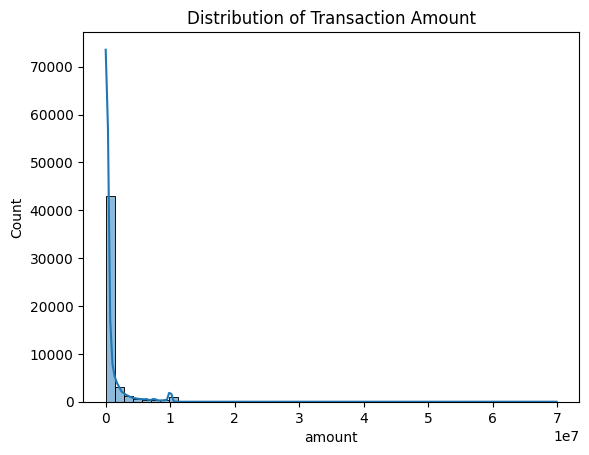

In [31]:
# EDA

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Distribution of Amount
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

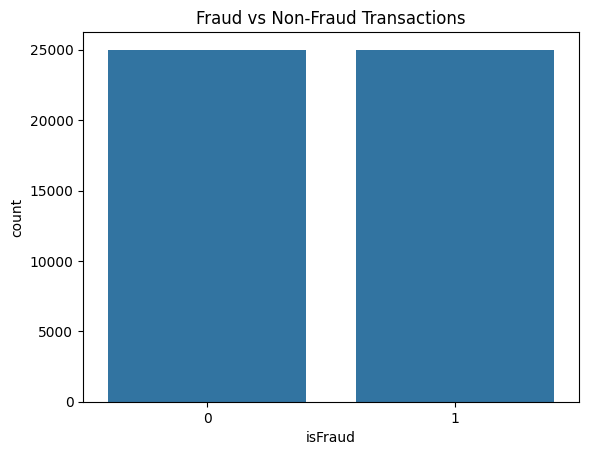

In [32]:
# Fraud vs Non-Fraud Count
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

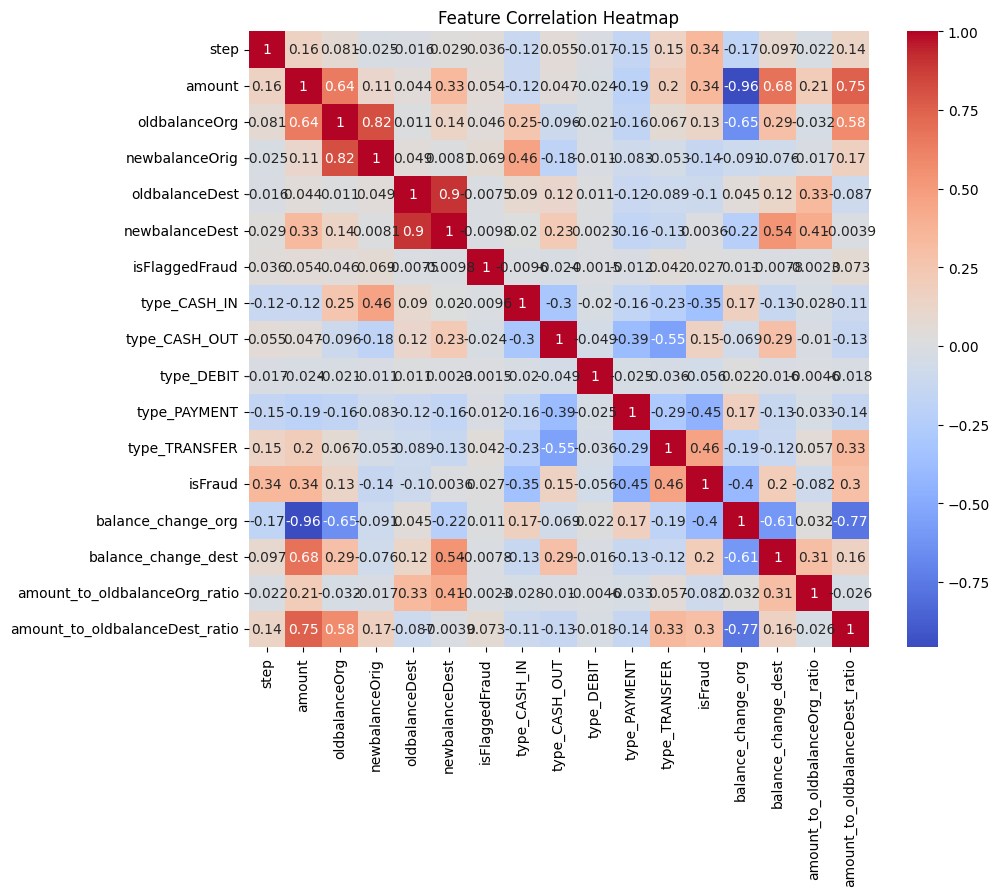

In [33]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [34]:
# Plotly - Amount vs isFraud
fig = px.box(df, x='isFraud', y='amount', title='Amount by Fraud Status')
fig.show()

In [35]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA reduced dimensions: {X_pca.shape[1]}")

PCA reduced dimensions: 10


In [36]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [38]:
# Random Forest (with Gaussian noise added to training data to further reduce overfitting)
import numpy as np
np.random.seed(42)
noise = np.random.normal(loc=0, scale=0.05, size=X_train.shape)
X_train_noisy = X_train + noise

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_noisy, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
# Cross Validation

from sklearn.model_selection import cross_val_score

models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
cv_results = {}

for name, model in models.items():
    if name == 'Random Forest':
        scores = cross_val_score(model, X_train_noisy, y_train, cv=5, scoring='roc_auc')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    cv_results[name] = scores
    print(f"{name} CV ROC-AUC: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression CV ROC-AUC: 0.9796 ± 0.0014
Random Forest CV ROC-AUC: 0.9849 ± 0.0009
XGBoost CV ROC-AUC: 0.9956 ± 0.0004


In [41]:
# Model Evaluation

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

for name, model in models.items():
    if name == 'Random Forest':
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5000
           1       0.90      0.94      0.92      5000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Logistic Regression ROC-AUC: 0.9803
Logistic Regression Confusion Matrix:
[[4502  498]
 [ 279 4721]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5000
           1       0.95      0.92      0.93      5000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Random Forest ROC-AUC: 0.9881
Random Forest Confusion Matrix:
[[4748  252]
 [ 394 4606]]

XGBoost Classification Report:
              precision    recall  f1-scor

In [42]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_noisy, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest ROC-AUC:", grid_rf.best_score_)
best_rf = grid_rf.best_estimator_

Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest ROC-AUC: 0.9848517083908841


In [43]:
# Model Comparison Plot

import plotly.graph_objects as go

model_names = list(cv_results.keys())
mean_scores = [cv_results[m].mean() for m in model_names]
best_idx = mean_scores.index(max(mean_scores))

fig = go.Figure()
fig.add_trace(go.Bar(x=model_names, y=mean_scores, name='Mean ROC-AUC'))
fig.add_annotation(
    x=model_names[best_idx],
    y=mean_scores[best_idx],
    text="Best Model",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)
fig.update_layout(title="Model Comparison (Mean ROC-AUC)", yaxis_title="ROC-AUC")
fig.show()

In [46]:
# Saving Best Model, Scaler, PCA

import joblib

joblib.dump(best_rf, 'models/best_xgboost_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(pca, 'models/pca.pkl')

print("Best model, scaler, and PCA saved for future use.")

Best model, scaler, and PCA saved for future use.
